# Model Training and Evaluation on Full Dataset After Cleaning

In [41]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, mean_squared_error
from sklearn import linear_model, metrics 
from sklearn.metrics import r2_score 
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
# Reading dataset and storing it in a dataframe
dataset = pd.read_csv('C:/Users/Akshay/USAccidentDataCleaned.csv')

In [43]:
# To get the info of the training dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033519 entries, 0 to 3033518
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             int64  
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 int64  
 5   Side                   int64  
 6   City                   int64  
 7   County                 int64  
 8   State                  int64  
 9   Zipcode                int64  
 10  Airport_Code           int64  
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         int64  
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      int64  
 17  Amenity                int64  
 18  Crossing               int64  
 19  Junction               int64  
 20  Railway                int64  
 21  Station                int64  
 22  Stop              

In [44]:
dataset.shape

(3033519, 28)

In [45]:
dataset.describe()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,...,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06
mean,2.332613e+00,1.408134e+06,3.656764e+01,-9.558495e+01,8.879352e+04,1.818988e+00,5.554379e+03,8.993583e+02,2.083909e+01,2.149408e+05,...,8.003675e-02,8.044255e-02,8.743641e-03,1.984725e-02,1.479536e-02,1.808942e-01,2.448358e-01,1.974960e-01,1.500053e-01,1.147463e-01
std,5.504645e-01,8.094315e+05,4.948028e+00,1.720250e+01,3.880920e+04,3.850287e-01,3.246291e+03,4.382131e+02,1.533744e+01,1.091862e+05,...,2.713501e-01,2.719771e-01,9.309776e-02,1.394752e-01,1.207330e-01,3.849306e-01,4.299899e-01,3.981098e-01,3.570767e-01,3.187155e-01
min,1.000000e+00,0.000000e+00,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,7.020895e+05,3.356905e+01,-1.172966e+02,6.430800e+04,2.000000e+00,2.522000e+03,5.460000e+02,3.000000e+00,1.312090e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.419508e+06,3.604750e+01,-9.043865e+01,8.502800e+04,2.000000e+00,5.738000e+03,9.010000e+02,2.000000e+01,2.281550e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000e+00,2.121744e+06,4.056412e+01,-8.099274e+01,1.174150e+05,2.000000e+00,8.414000e+03,1.281000e+03,3.600000e+01,3.193790e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,2.771778e+06,4.900220e+01,-6.711317e+01,1.634420e+05,2.000000e+00,1.149300e+04,1.703000e+03,4.800000e+01,3.772170e+05,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [46]:
# Initializing the Matrix of Features Independent Variable (X) and the Dependent Variable (y)
X = dataset.drop(['Severity'], axis=1)
y = dataset['Severity']

In [47]:
X.head()

,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Airport_Code,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,39.063148,-84.032608,142374,2,11215,318,33,194012,943,...,0,0,0,0,0,1,1,1,0,0
1,2,39.747753,-84.205582,85094,2,2472,1039,33,197841,498,...,0,0,0,0,0,0,1,0,0,0
2,3,39.627781,-84.188354,99443,2,2472,1039,33,198884,1208,...,0,0,0,0,0,1,0,0,0,0
3,4,40.100590,-82.925194,159616,2,11079,546,33,188166,411,...,0,0,0,0,0,0,0,0,0,0
4,6,39.758274,-84.230507,108471,2,2472,1039,33,197946,498,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y.head()

0    2
1    3
2    2
3    3
4    2
Name: Severity, dtype: int64

In [49]:
# Spliting Data into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [50]:
# Feature Scaling - Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
print(X_train)

[[-0.22399237 -0.76646201 -0.06976191 ... -0.4961171  -0.42019925
  -0.3601799 ]
 [-0.90839478 -0.24376142  0.86312146 ... -0.4961171  -0.42019925
  -0.3601799 ]
 [-0.02701871 -0.63372928 -1.28009126 ... -0.4961171  -0.42019925
  -0.3601799 ]
 ...
 [ 1.22374816 -0.72820507 -1.25014679 ...  2.01565316 -0.42019925
  -0.3601799 ]
 [ 1.35030721 -2.06836993  0.80137643 ... -0.4961171  -0.42019925
  -0.3601799 ]
 [-1.60922298  0.93898352 -0.02232358 ... -0.4961171  -0.42019925
  -0.3601799 ]]


In [52]:
print(X_test)

[[ 0.34848312 -1.27373044 -0.12531241 ... -0.4961171  -0.42019925
  -0.3601799 ]
 [-1.47891726 -1.86512181  0.76411376 ... -0.4961171  -0.42019925
  -0.3601799 ]
 [ 1.57766187  0.50131191  0.06685351 ... -0.4961171  -0.42019925
  -0.3601799 ]
 ...
 [ 0.00824296 -0.22854329 -0.11469718 ... -0.4961171  -0.42019925
  -0.3601799 ]
 [ 0.52586368 -1.27066167 -0.11572512 ... -0.4961171  -0.42019925
  -0.3601799 ]
 [ 0.44182246  1.0515237   1.33241359 ... -0.4961171  -0.42019925
  -0.3601799 ]]


# Logistic Regression Classifier 

In [53]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 1, max_iter=200)
classifier_LR.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [54]:
# Predicting the Test set results
y_pred_LR = classifier_LR.predict(X_test)
print(y_pred_LR)

[2 3 2 ... 2 2 2]


In [55]:
# Initialize an empty list for storing the Accuracy for each algorithm
accuracy_list = []
# Initialize an empty list for storing the Mean Squared Error for each algorithm
MeanSquaredError_list = []

In [56]:
# Making the Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
print('Confusion Matrix : ')
print(cm_LR)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_LR = accuracy_score(y_test, y_pred_LR)
print('Logistic Regression Classifier- Accuracy Score : ', acc_LR)
# Append to the accuracy list
accuracy_list.append(acc_LR)

Confusion Matrix : 
[[   368   5367     37      1]
 [    85 388609  23856     62]
 [     4 143960  25468     31]
 [    19  15509   3226    102]]

Linear Regression Classifier- Accuracy Score :  0.6832771829425881


In [57]:
print(classifier_LR.intercept_)
print(classifier_LR.coef_)

[-5.3274539   3.3473591   2.20719489 -0.2271001 ]
[[ 2.90103096e+00 -2.93524837e-01 -5.08442471e-01 -5.58903832e-02
  -1.05464495e-01  1.82432691e-01 -2.17176991e-02  4.26344219e-02
  -2.33256352e-01 -9.70587245e-02  2.57492658e-02 -1.66348160e-01
  -4.67611697e-03  2.26223548e-02 -4.92141489e-03  2.69773144e-02
   1.58242279e-02  2.69288129e-01  7.14738861e-02 -2.28979317e-02
   2.41990284e-02  5.33116946e-02  3.09612344e-01  3.12946437e-03
  -6.91352539e-02 -7.10632394e-03 -3.56264475e-02]
 [-8.62942278e-01 -2.84110173e-02 -3.77608071e-01  3.20597715e-01
  -2.57801394e-01 -8.74526791e-02  1.07178065e-01  5.27992933e-02
  -1.69480424e-01  2.46801318e-02 -7.00827439e-02  7.34072320e-02
   4.66349705e-02 -1.75531320e-02 -2.81497476e-02 -2.08009119e-02
   2.93478691e-02 -5.71445191e-04 -7.59102995e-02 -2.88630683e-03
   2.67365212e-02  6.72236798e-02  1.84937307e-01 -1.95394275e-02
   4.22803123e-03 -3.77908814e-02 -8.75457522e-02]
 [-1.04284398e+00  7.28064204e-02  1.29806035e-01  2.595

In [58]:
type(y_pred_LR)

numpy.ndarray

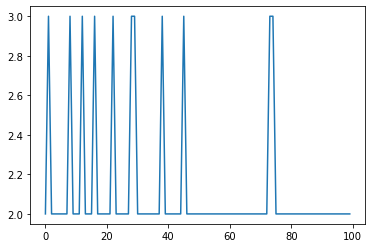

In [59]:
# Plot 100 Predicted Values
import matplotlib.pyplot as plt
plt.plot(y_pred_LR[:100])

In [60]:
type(y_test)

pandas.core.series.Series

In [61]:
y_test2 = y_test.values
type(y_test2)

numpy.ndarray

In [62]:
y_test2[:100]

array([2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 3, 2, 4, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2], dtype=int64)

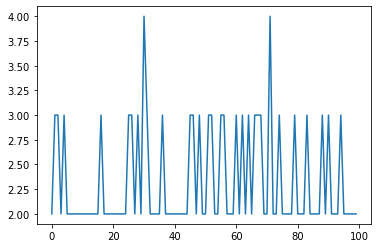

In [63]:
# Plot 100 Test Values
import matplotlib.pyplot as plt
plt.plot(y_test2[:100])

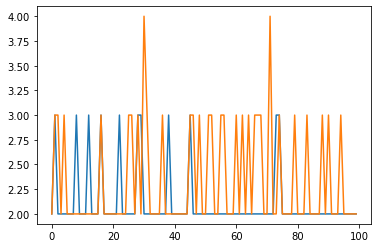

In [64]:
import matplotlib.pyplot as plt
plt.plot(y_pred_LR[:100])
plt.plot(y_test2[:100])

In [65]:
# Mean Squared Error
mse_LR = metrics.mean_squared_error(y_test, y_pred_LR)
print('Logistic Regression Classifier- Mean Squared Error:', mse_LR)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_LR)

Mean Squared Error: 0.3941839842822859


# K-Nearest Neighbors Classifier

In [66]:
# Training the K-Nearest Neighbors model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train[:20000], y_train[:20000])

KNeighborsClassifier(n_neighbors=6)

In [67]:
# Predicting the Test set results
y_pred_KNN = classifier_KNN.predict(X_test)
print(y_pred_KNN)

[2 2 3 ... 2 2 2]


In [68]:
# Making the Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print('Confusion Matrix : ')
print(cm_KNN)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_KNN = accuracy_score(y_test, y_pred_KNN)
print('K-NN Classifier- Accuracy Score : ', acc_KNN)
# Append to the accuracy list
accuracy_list.append(acc_KNN)

Confusion Matrix : 
[[   885   4354    528      6]
 [   872 360248  51188    304]
 [   104 111014  58103    242]
 [    57  14130   4464    205]]

K-NN Classifier- Accuracy Score :  0.691343719507371


In [69]:
# Mean Squared Error
mse_KNN = metrics.mean_squared_error(y_test, y_pred_KNN)
print('K-NN Classifier- Mean Squared Error:', mse_KNN)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_KNN)

K-NN Classifier- Mean Squared Error: 0.3839846119359688


# Naive Bayes Classifier

In [70]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

GaussianNB()

In [71]:
# Predicting the Test set results
y_pred_NB = classifier_NB.predict(X_test)
print(y_pred_NB)

[2 3 3 ... 2 3 3]


In [72]:
# Making the Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix : ')
print(cm_NB)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_NB = accuracy_score(y_test, y_pred_NB)
print('Naive Bayes Classifier- Accuracy Score : ', acc_NB)
# Append to the accuracy list
accuracy_list.append(acc_NB)

Confusion Matrix : 
[[  2138   1093   2452     90]
 [ 15395 152913 231434  12870]
 [  3464  15359 148449   2191]
 [   629   4166  12193   1868]]

Naive Bayes Classifier- Accuracy Score :  0.5033228724386192


In [73]:
# Mean Squared Error
mse_NB = metrics.mean_squared_error(y_test, y_pred_NB)
print('Naive Bayes Classifier- Mean Squared Error:', mse_NB)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_NB)

Naive Bayes Classifier- Mean Squared Error: 0.6196497797937709


# Support Vector Machine Classifier

In [74]:
# Training the Support Vector Machine model on the Training set
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train[:20000], y_train[:20000])

SVC(kernel='linear', random_state=0)

In [75]:
# Predicting the Test set results
y_pred_SVM = classifier_SVM.predict(X_test)
print(y_pred_SVM)

[2 2 2 ... 2 2 2]


In [76]:
# Making the Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix : ')
print(cm_SVM)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_SVM = accuracy_score(y_test, y_pred_SVM)
print('SVM Classifier- Accuracy Score : ', acc_SVM)
# Append to the accuracy list
accuracy_list.append(acc_SVM)

Confusion Matrix : 
[[     0   5773      0      0]
 [     0 412612      0      0]
 [     0 169463      0      0]
 [     0  18856      0      0]]

SVM Classifier- Accuracy Score :  0.6800878187715921


In [77]:
# Mean Squared Error
mse_SVM = metrics.mean_squared_error(y_test, y_pred_SVM)
print('SVM Classifier- Mean Squared Error:', mse_SVM)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_SVM)

SVM Classifier- Mean Squared Error: 0.41315039953585275


# Decision Tree Classifier

In [78]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [79]:
# Predicting the Test set results
y_pred_DT = classifier_DT.predict(X_test)
print(y_pred_DT)

[2 3 3 ... 2 2 4]


In [80]:
# Making the Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
print('Confusion Matrix : ')
print(cm_DT)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_DT = accuracy_score(y_test, y_pred_DT)
print('Decision Tree Classifier- Accuracy Score : ', acc_DT)
# Append to the accuracy list
accuracy_list.append(acc_DT)

Confusion Matrix : 
[[  3507   1639    499    128]
 [  1839 357050  47060   6663]
 [   484  45768 118685   4526]
 [   100   5730   4230   8796]]

Decision Tree Classifier- Accuracy Score :  0.8044087396819536


In [81]:
# Mean Squared Error
mse_DT = metrics.mean_squared_error(y_test, y_pred_DT)
print('Decision Tree Classifier- Mean Squared Error:', mse_DT)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_DT)

Decision Tree Classifier- Mean Squared Error: 0.26473865344550224


# Random Forest Classifier

In [82]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [83]:
# Predicting the Test set results
y_pred_RF = classifier_RF.predict(X_test)
print(y_pred_RF)

[2 3 3 ... 2 2 3]


In [84]:
# Making the Confusion Matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
print('Confusion Matrix : ')
print(cm_RF)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_RF = accuracy_score(y_test, y_pred_RF)
print('Random Forest Classifier- Accuracy Score : ', acc_RF)
# Append to the accuracy list
accuracy_list.append(acc_RF)

Confusion Matrix : 
[[  3518   1853    381     21]
 [  1071 376811  33216   1514]
 [   258  47435 120660   1110]
 [    86   6777   4109   7884]]

Random Forest Classifier- Accuracy Score :  0.8387500329650044


In [85]:
# Mean Squared Error
mse_RF = metrics.mean_squared_error(y_test, y_pred_RF)
print('Random Forest Classifier- Mean Squared Error:', mse_RF)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_RF)

Random Forest Classifier- Mean Squared Error: 0.20681749254990903


# Accuracy Score of All Models

In [86]:
# Accuracy List of all the Models
print(accuracy_list)

[0.6832771829425881, 0.691343719507371, 0.5033228724386192, 0.6800878187715921, 0.8044087396819536, 0.8387500329650044]


In [87]:
BBox = ((dataset.Start_Lng.min(), dataset.Start_Lng.max(), dataset.Start_Lat.min(), dataset.Start_Lat.max()))
BBox

(-124.623833, -67.113167, 24.555269, 49.002201)

NameError: name 'map_pic' is not defined

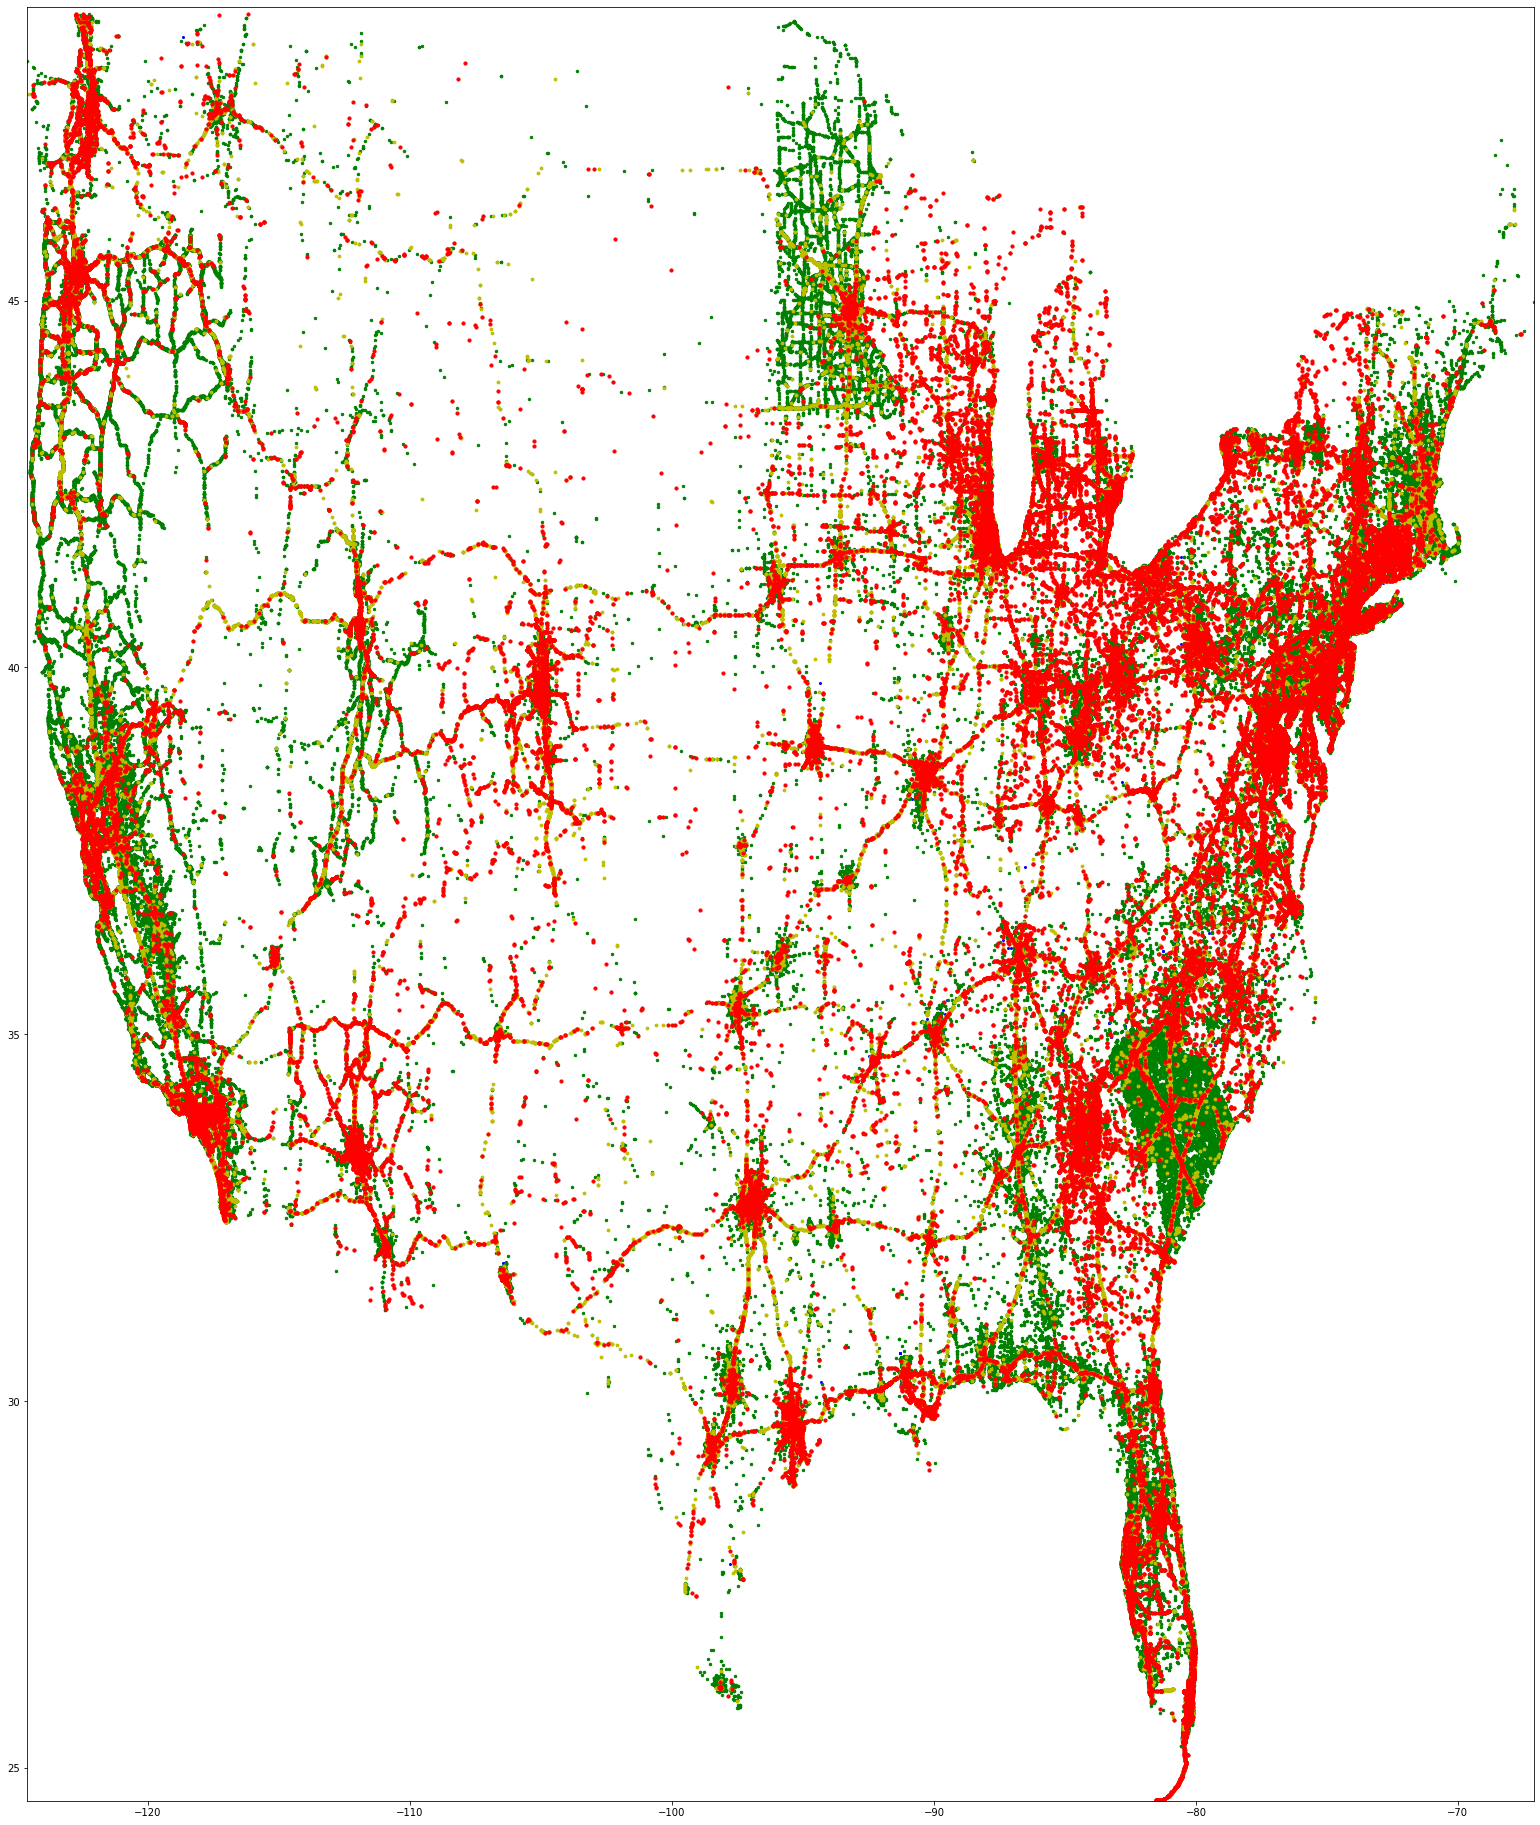

In [88]:
fig, ax = plt.subplots(figsize = (27,33))
ax.scatter(dataset[dataset['Severity']==1].Start_Lng, dataset[dataset['Severity']==1].Start_Lat-.1, zorder=1, c='b', s=4)
ax.scatter(dataset[dataset['Severity']==2].Start_Lng, dataset[dataset['Severity']==2].Start_Lat-.1, zorder=1, c='g', s=6)
ax.scatter(dataset[dataset['Severity']==3].Start_Lng, dataset[dataset['Severity']==3].Start_Lat-.1, zorder=1, c='y', s=8)
ax.scatter(dataset[dataset['Severity']==4].Start_Lng, dataset[dataset['Severity']==4].Start_Lat-.1, zorder=1, c='r', s=10)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_pic, zorder=0, extent = BBox, aspect= 'auto', interpolation='none')
ax.imshow(map_pic, zorder=2, alpha= 0.5, extent = BBox, aspect= 'auto', interpolation='lanczos')